In [ ]:
 # pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import re

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier

!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

!pip install scorecardpy
import scorecardpy as sc
import mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=234cee6c2ff6fb5f5b1133b9ae0329279ea55b07c08a588a058a0af3aaa70e71
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


**Step 1: Setup Kaggle API in Colab**
Obtain Kaggle API Key
*   Go to Kaggle.
*   Log in and navigate to your account settings.
*   Under the "API" section, click "Create New API Token." A kaggle.json file will be downloaded.

In [ ]:
#Upload Kaggle API Key to Colab

from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rupsabaner","key":"5a0b085ecb66abed58661d0b242dc4c3"}'}

In [ ]:
#Set up Kaggle API Credentials
!mkdir -p ~/.kaggle #make directory
!cp kaggle.json ~/.kaggle/ #copy the json file to the directory
!chmod 600 ~/.kaggle/kaggle.json #sets the file's permissions so only the owner can read and write it, keeping the API key secure.

In [ ]:
#Install Kaggle API
!pip install kaggle

#Download Dataset Using Kaggle API
!kaggle datasets download -d pradip11/amexpert-codelab-2021

Dataset URL: https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021
License(s): other
  0% 0.00/1.98M [00:00<?, ?B/s]
100% 1.98M/1.98M [00:00<00:00, 129MB/s]


In [ ]:
#Unzip the dataset:
import zipfile
zipfile.ZipFile("amexpert-codelab-2021.zip", "r").extractall("amexpert-codelab-2021")

In [ ]:
#Load and Use the Data
import pandas as pd

# Load the dataset
file_path = "/content/amexpert-codelab-2021/train.csv"
train = pd.read_csv(file_path)

# Display the first few rows
train.head()


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
pd.set_option('display.max_columns', None) # Displays all columns in a DataFrame without truncation.
pd.set_option('display.max_colwidth', None) #Displays the full content of each cell without truncating its width.

In [ ]:
train["credit_card_default"].value_counts(normalize=True) #calculates the percentage of each unique value (0 or 1) in the credit_card_default column.

,proportion
credit_card_default,
0,0.918797
1,0.081203


In [ ]:
df = train.sample(n = 30000, random_state = 42, replace = False) #random sampling of 30000 rows,no duplicates
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [ ]:
#Explore the dataset further:
train.isnull().sum()

#Get data types and basic statistics:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [ ]:
# check shape and length
print(df.shape)

(30000, 19)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

#List of categorical and numerical columns

In [ ]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"] # List of categorical columns (with object data type) in the df DataFrame.
num_feats =  [col for col in df.columns if df[col].dtypes != "object"] #List of numerical columns (not object data type) in the df DataFrame.

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [ ]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [ ]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [ ]:
df.duplicated().sum()

0

#checking null values

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10) #top 10 columns in the df  with the most missing (NaN) values, sorted in descending order (from most to least missing values).

,0
no_of_children,502
owns_car,369
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
customer_id,0
default_in_last_6months,0
prev_defaults,0


## check the default variable



In [ ]:
df["credit_card_default"].value_counts()

,count
credit_card_default,
0,27537
1,2463


In [ ]:
df["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.9179
1,0.0821


In [ ]:
df[cat_feats].isnull().sum() #number of missing (NaN) values for each categorical column

,0
customer_id,0
name,0
gender,0
owns_car,369
owns_house,0
occupation_type,0


In [ ]:
for i in cat_feats: #Loops through each categorical feature (column) in the cat_feats list.
    print("Column Name:",i) #Prints the name of the current categorical column.
    print(df[i].value_counts(normalize=True)) #Prints the percentages of each unique value in the current categorical column.
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

#Handling missing values
1.  Identify categorical and numerical variables:

Categorical variables are typically of type object or category.

Numerical variables are typically of types like int or float.
2.  Impute missing values:

For categorical variables, impute using the mode (the most frequent value).

For numerical variables, impute using the median (the middle value of the data when sorted).

In [ ]:
# For each categorical column, fill missing values with the mode (most frequent value)
for col in cat_feats:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For each numerical column, fill missing values with the median
for col in num_feats:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-22-edf517b69a39>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-22-edf517b69a39>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

### Gender

In [ ]:
df[df['gender'] == 'XNA'] #Filters the rows where the gender column has the value 'XNA'

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [ ]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

,count
gender,
F,19731
M,10269


In [ ]:
df["owns_car"].value_counts(normalize=True)

,proportion
owns_car,
N,0.665033
Y,0.334967


In [ ]:
df[cat_feats].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,0
owns_house,0
occupation_type,0


## checking missing values in numerical features


In [ ]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

,0
age,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
total_family_members,0
migrant_worker,0
yearly_debt_payments,0
credit_limit,0
credit_limit_used(%),0
credit_score,0


In [ ]:
df.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


## create a pie chart showing the ratio of credit card defaulters vs non-defaulters in the dataset.

*   Shows the proportion of defaulters vs. non-defaulters in the dataset.
*   Purpose: To identify class imbalance, which can affect the performance of predictive models.

         If one class dominates, resampling techniques or weighted models might be needed.

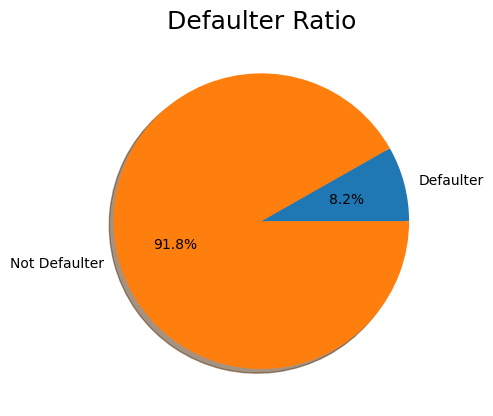

In [ ]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values #calculates the count of each unique value (defaulter vs non-defaulter),sorts the values in ascending order,

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

#Age Distribution Plot:

Interpretation: Displays the age distribution of customers.
*   Are there age groups with more customers?
*   Are there any outliers or skewness?
Purpose: To understand the age demographics and detect anomalies in data.

<ipython-input-27-1122626ba072>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']) #Uses Seaborn's distplot to create a histogram of the age column.


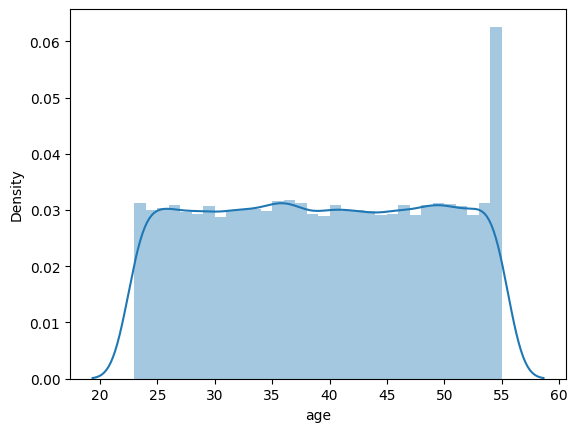

In [ ]:
# distribution plot to visualize the distribution of the age feature in the dataset
plt.figure()
sns.distplot(df['age']) #Uses Seaborn's distplot to create a histogram of the age column.
plt.show()

#Boxplot of Credit Default vs. Credit Score:

Interpretation:


*   Shows how credit scores vary between defaulters and non-defaulters.
*   Lower scores for defaulters indicate a relationship between credit score and default risk.

Purpose: To explore correlations that can be used for prediction.

A boxplot compares credit scores of two groups: defaulters(0) and non-defaulters(1)

If defaulters have lower credit scores, it shows that people with lower scores are more likely to default.
This means credit score can help predict default risk.

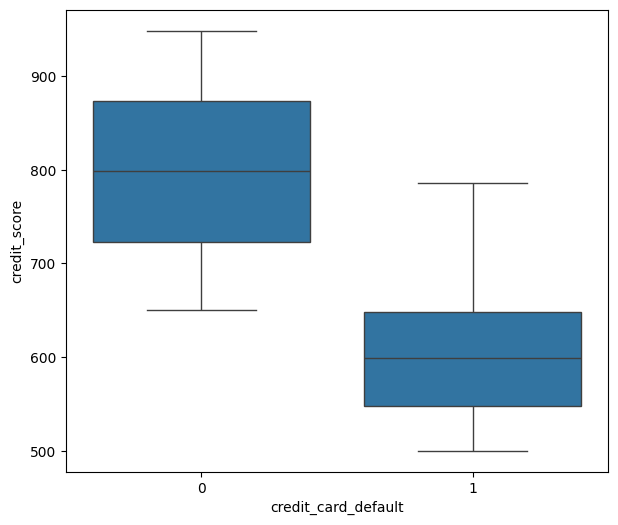

In [ ]:
# Boxplot of credit_card_default and credit_score;  the distribution of credit_score for each category of credit_card_default.
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
plt.show()

#Boxplot of Credit Default vs. Credit Limit Utilization:

Interpretation:

*   Higher credit utilization percentages might correlate with defaults.
Purpose: To find patterns that help model credit risk, as higher utilization may indicate financial stress.



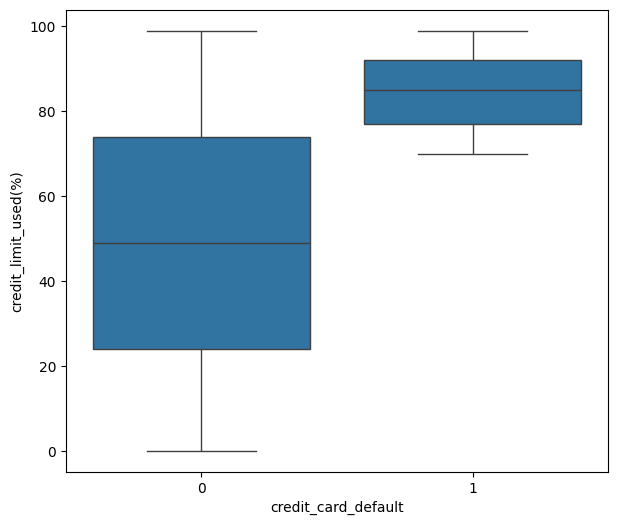

In [ ]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
plt.show()

#Barplot of Occupation Type vs. Net Yearly Income (by Default Status):

Interpretation:

*   Analyzes how income varies by occupation and default status.
*   Some occupations might have lower income or higher default rates.

Purpose: To assess the impact of occupation and income on defaults, potentially adding to model features.

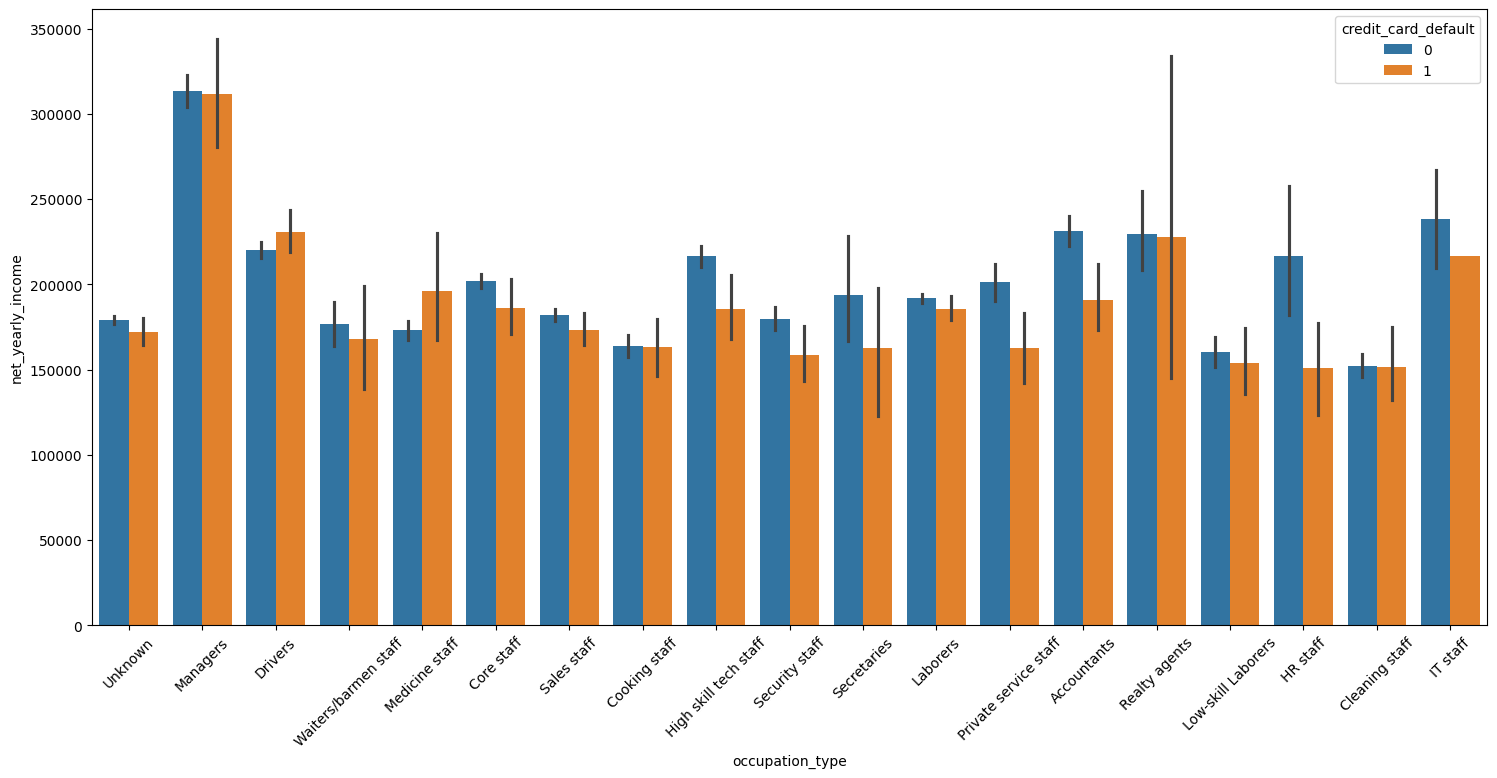

In [ ]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

#Countplot of Gender by Credit Default:

Interpretation:

*   Compares the proportion of male vs. female defaulters.
*   If one gender defaults more, it might highlight behavioral or systemic differences.
Purpose: To identify gender-based trends that can guide credit risk analysis.



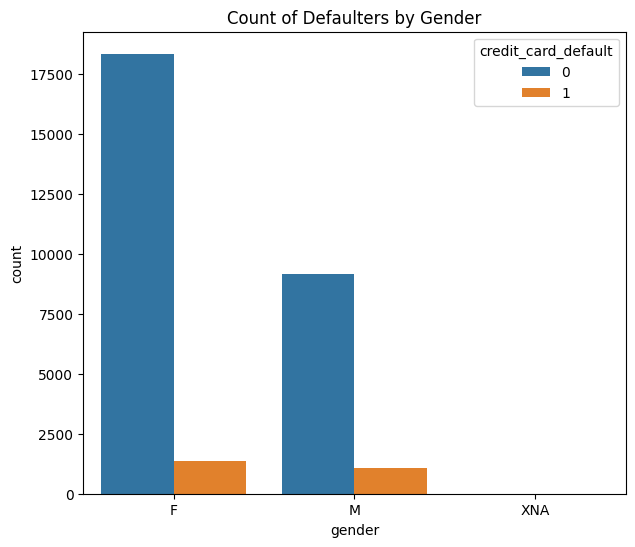

In [ ]:
# Male or female defaulters
plt.figure(figsize=[7, 6])
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.title("Count of Defaulters by Gender")
plt.show()

#Boxplots of Continuous Variables:

Interpretation:

*   Helps visualize distributions, outliers, and ranges of variables like net_yearly_income, no_of_days_employed, yearly_debt_payments, credit_limit, and credit_score.

Purpose:

*   Detects outliers that might skew the model.
*   Assesses variable variability and distribution for normalization or transformation before model training.





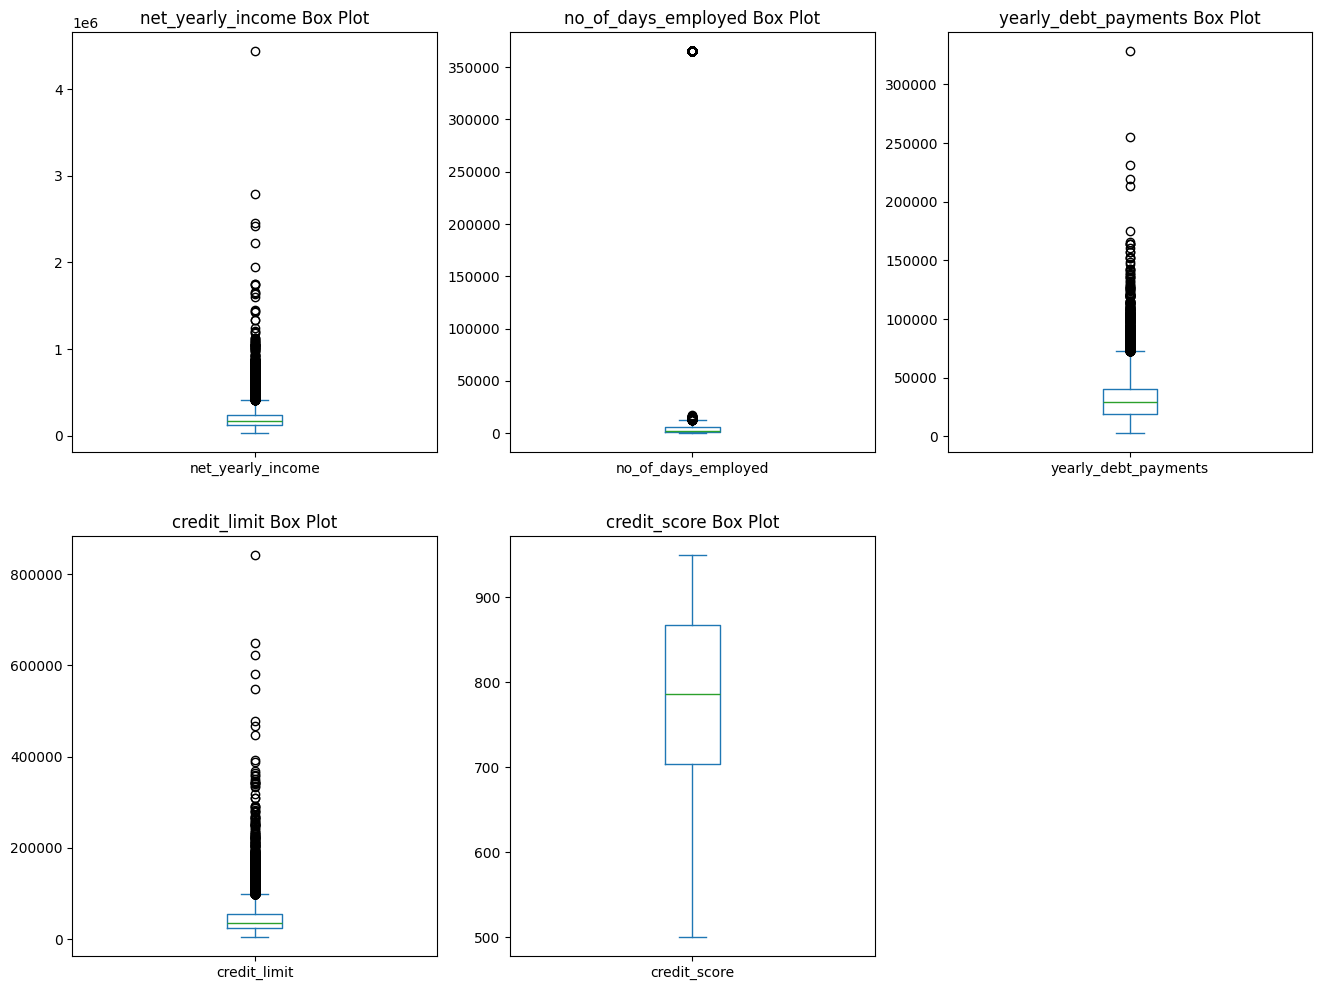

In [ ]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# Data Processing
specifically focusing on identifying and removing features (columns) that have low Information Value (IV), which indicates their predictive power for the target variable (in this case, credit_card_default).

## Drop columns which have IV < 0.02

#Binning Functions (mono_bin and char_bin):
These functions perform binning of continuous and categorical features based on their relationship with the target variable (credit_card_default).

mono_bin(Y, X): Bins continuous variables using quantiles and calculates metrics like Weight of Evidence (WOE) and IV. The WOE helps measure the predictive power of the feature and is used to decide if a variable should be included in the model.

char_bin(Y, X): Bins categorical variables and calculates the same metrics.

#IV Calculation:

The IV (Information Value) is computed for each feature to measure its predictive power in distinguishing between defaulters and non-defaulters.

High IV (> 0.02) indicates good predictive power.

Low IV (< 0.02) suggests that the feature doesn't help much in predicting the target variable.

#Feature Selection:

After calculating IV for all features, features with low IV values (less than 0.02) are considered non-predictive and are dropped.

The IV dataframe ranks features based on their IV, and features with IV below 0.02 are dropped from the dataset (e.g., ['age', 'owns_house', 'yearly_debt_payments', ...]).

In [ ]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket'Data Processing
specifically focusing on identifying and removing features (columns) that have low Information Value (IV), which indicates their predictive power for the target variable (in this case, credit_card_default).

Drop columns which have IV < 0.02
Binning Functions (mono_bin and char_bin):
These functions perform binning of continuous and categorical features based on their relationship with the target variable (credit_card_default).

mono_bin(Y, X): Bins continuous variables using quantiles and calculates metrics like Weight of Evidence (WOE) and IV. The WOE helps measure the predictive power of the feature and is used to decide if a variable should be included in the model.

char_bin(Y, X): Bins categorical variables and calculates the same metrics.

IV Calculation:
The IV (Information Value) is computed for each feature to measure its predictive power in distinguishing between defaulters and non-defaulters.

High IV (> 0.02) indicates good predictive power.

Low IV (< 0.02) suggests that the feature doesn't help much in predicting the target variable.

, as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = np.percentile(notmiss.X, np.linspace(0, 100, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = pd.concat([iv_df, conv], ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df.drop(columns =["customer_id", "name", 'credit_card_default']), df["credit_card_default"])

<ipython-input-40-84045ca15225>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
<ipython-input-40-84045ca15225>:15: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
<ipython-input-40-84045ca15225>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
<ipython-input-40-84045ca15225>:15: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the

In [ ]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,23,39,15426,1268,0.082199,14158,0.917801,0.514819,0.514145,0.001311,0.000002
1,age,40,55,14574,1195,0.081995,13379,0.918005,0.485181,0.485855,-0.001390,0.000002
2,gender,F,F,19731,1378,0.069839,18353,0.930161,0.559480,0.666485,-0.175009,0.048525
3,gender,M,M,10268,1085,0.105668,9183,0.894332,0.440520,0.333479,0.278376,0.048525
4,gender,XNA,XNA,1,0,0.000000,1,1.000000,0.000000,0.000036,0.000000,0.048525
5,owns_car,N,N,19951,1709,0.085660,18242,0.914340,0.693869,0.662454,0.046332,0.004524
6,owns_car,Y,Y,10049,754,0.075032,9295,0.924968,0.306131,0.337546,-0.097689,0.004524
7,owns_house,N,N,9114,757,0.083059,8357,0.916941,0.307349,0.303483,0.012659,0.000070
8,owns_house,Y,Y,20886,1706,0.081682,19180,0.918318,0.692651,0.696517,-0.005566,0.000070
9,no_of_children,0.0,1.0,27010,2196,0.081303,24814,0.918697,0.891596,0.901115,-0.010620,0.000976


In [ ]:
IV.sort_values('IV')

,VAR_NAME,IV
0,age,0.000002
15,yearly_debt_payments,0.000029
12,owns_house,0.000070
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [ ]:
IV.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
0,age,0.000002
15,yearly_debt_payments,0.000029
12,owns_house,0.000070
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [ ]:
IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['age', 'yearly_debt_payments', 'owns_house', 'credit_limit',
       'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker'], dtype=object)

**We will drop some low (< 0.02) IV columns**

In [ ]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

## WOE binning
The WOE (Weight of Evidence) Binning is a technique used for transforming continuous variables into categorical bins, while also handling missing values. It's commonly used in credit scoring and other binary classification tasks.

#What the woebin() function does:
1. It bins continuous variables into discrete categories based on the relationship between the feature and the target variable (credit_card_default in your case).
2. It calculates the Weight of Evidence (WOE) for each bin. The WOE measures the strength of the relationship between the feature and the target by comparing the distribution of the feature for the positive (event) and negative (non-event) classes.

#The WOE formula:

#WOE=log(Event Rate/Non-Event Rate)

Where:

Event Rate is the percentage of events (e.g., defaults) in a bin.

Non-Event Rate is the percentage of non-events (e.g., non-defaults) in a bin.

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

Binning on 30000 rows and 17 columns in 00:00:14


{'occupation_type': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>}

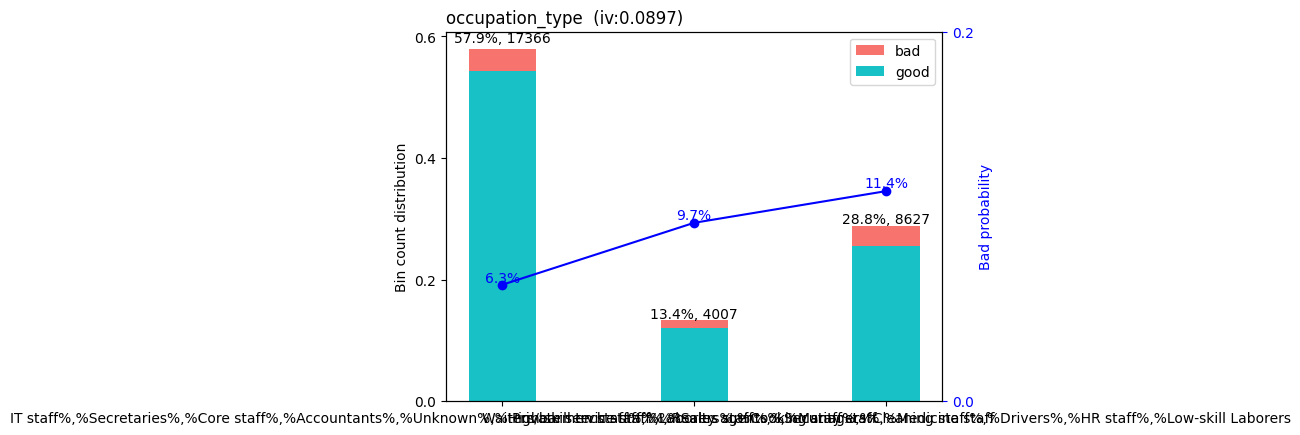

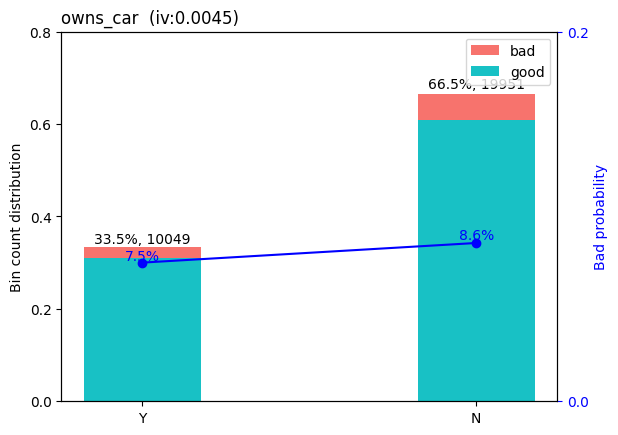

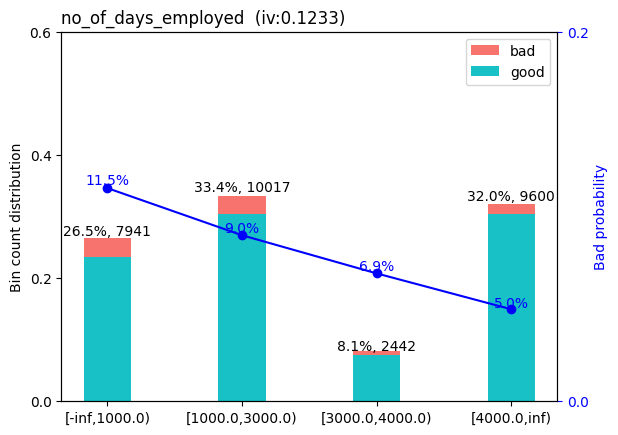

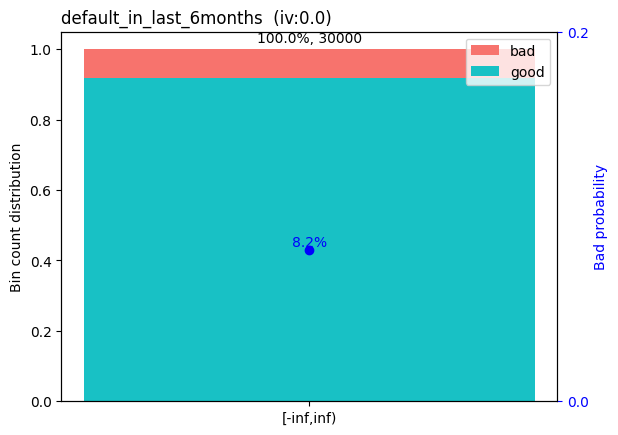

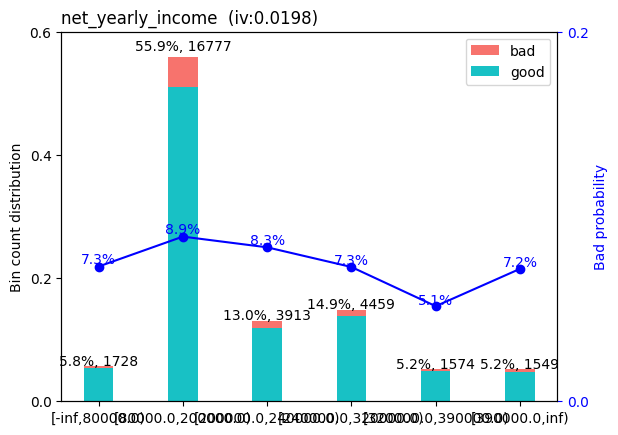

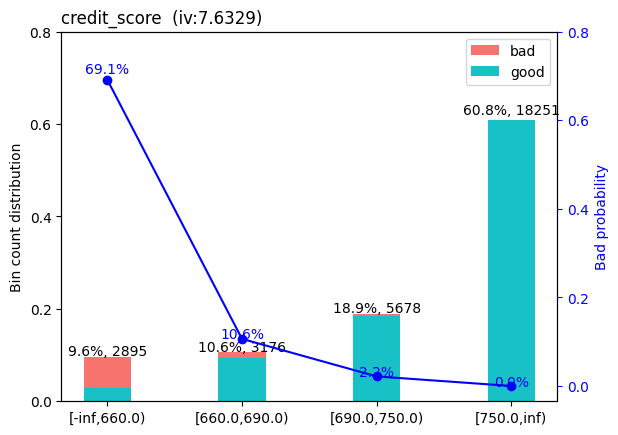

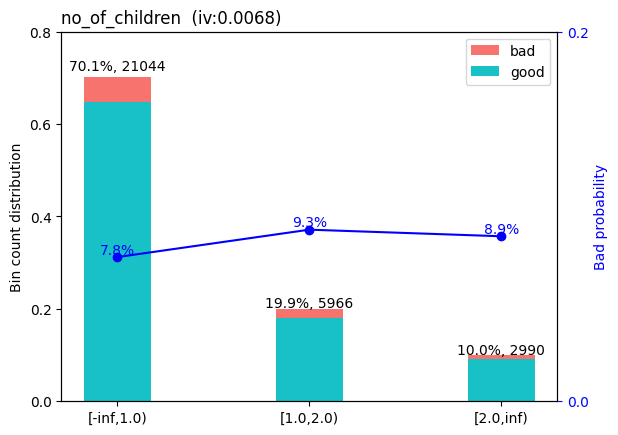

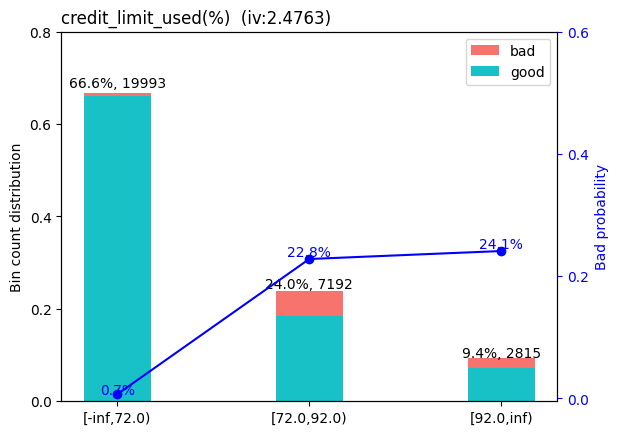

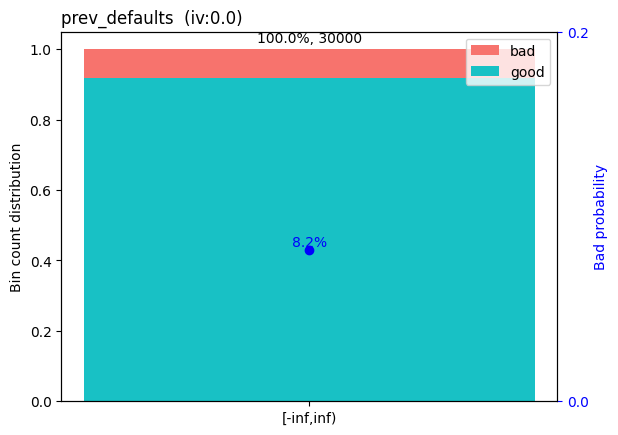

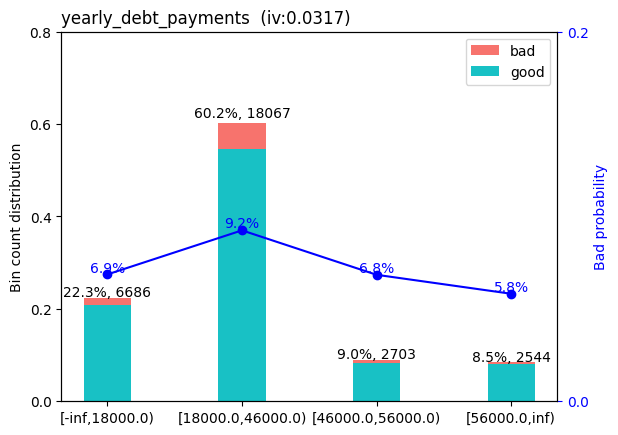

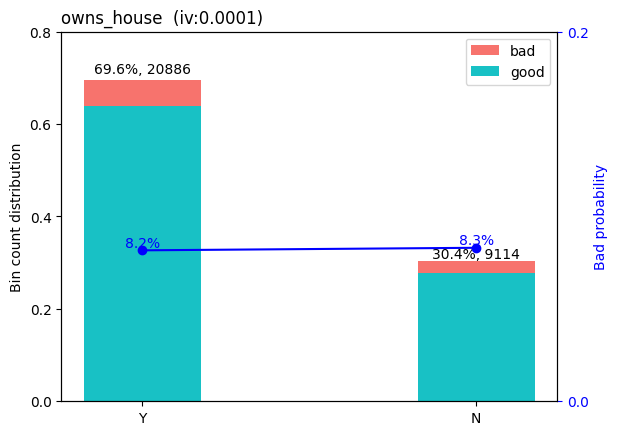

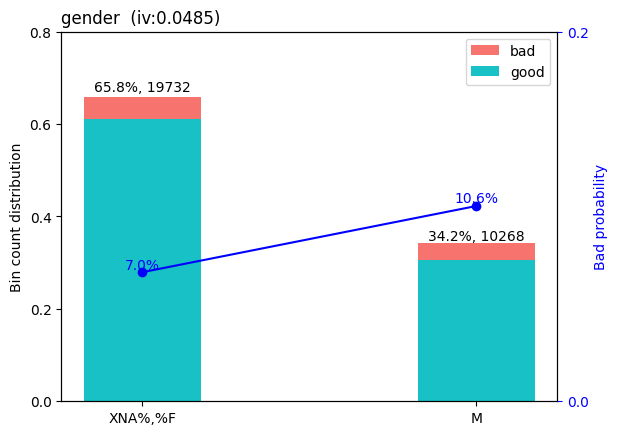

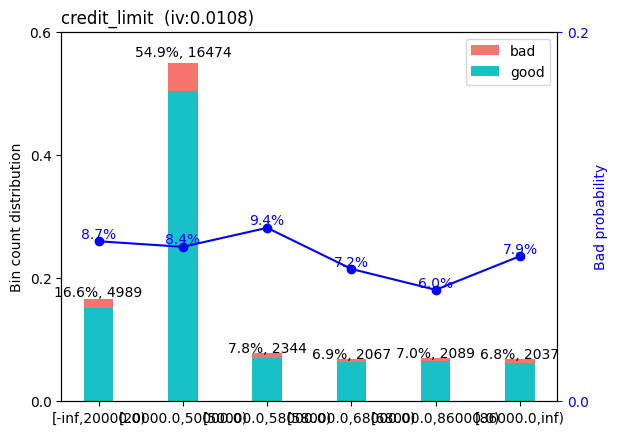

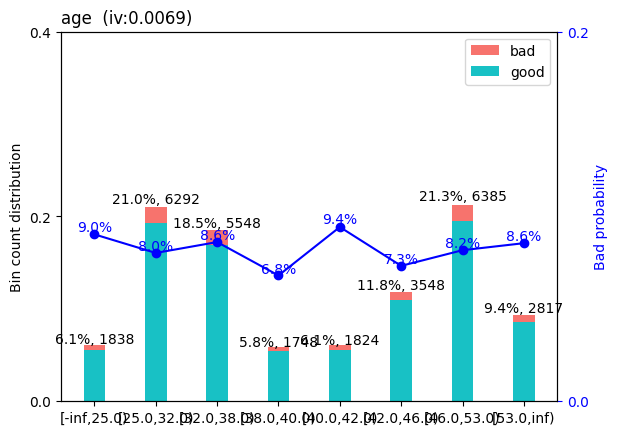

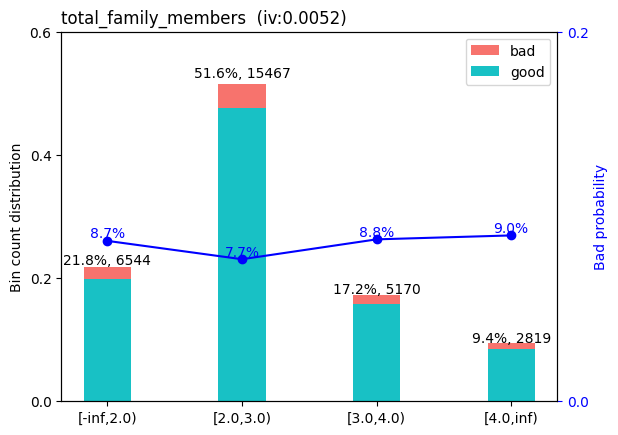

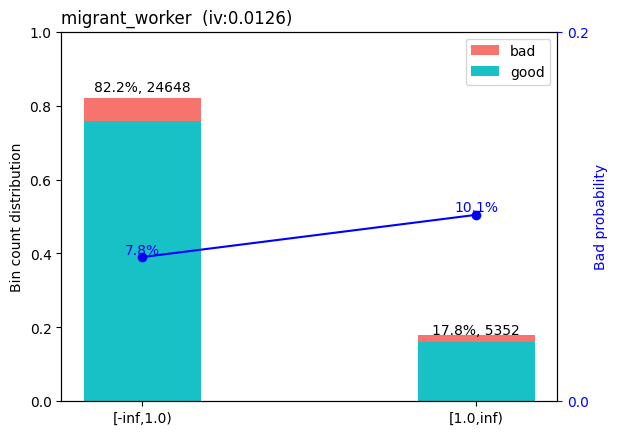

In [ ]:
#The plot generated by woebin_plot(bins) typically shows the WOE values on the y-axis and the bins (or categories) of the feature on the x-axis.
#The bins represent the ranges or categories into which your continuous variable is divided based on the woebin() function.
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

#Key points to interpret:
#WOE Significance:

Positive WOE values indicate that the bin is more likely to belong to the non-event class (e.g., non-defaults).

Negative WOE values indicate that the bin is more likely to belong to the event class (e.g., defaults).

WOE values close to zero indicate that the bin is equally likely to belong to both classes (event and non-event).
#WOE Trend:

A decreasing WOE across bins can indicate that as the values of the feature increase, the likelihood of the event (e.g., credit card default) also increases.

An increasing WOE can suggest the opposite, where higher values of the feature are associated with a lower likelihood of the event.
#Bin Distribution:

The width of each bin shows how the feature is distributed across its range.

If a bin has very few data points, the WOE value may be unstable due to a small sample size, so these bins should be interpreted with caution.
#WOE for each feature:

For each feature, you'll have a set of bins. The WOE plot allows you to see how the relationship between the feature and the target is distributed across these bins.

#WOE transformation to the training dataset:

In [ ]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins) #converts the original features in df into WOE values based on the binning information (bins) generated earlier. Each continuous feature is transformed into WOE values according to its respective bin.
train_woe.drop(columns = ["customer_id", "name"], inplace = True) # This removes the customer_id and name columns from the train_woe DataFrame since they are non-numeric identifiers and not relevant for model training.
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,occupation_type_woe,owns_house_woe,gender_woe,owns_car_woe,yearly_debt_payments_woe,credit_limit_woe,no_of_days_employed_woe,default_in_last_6months_woe,credit_limit_used(%)_woe,net_yearly_income_woe,credit_score_woe,prev_defaults_woe,age_woe,total_family_members_woe,no_of_children_woe,migrant_worker_woe
34126,0,-0.284480,-0.005566,-0.175064,0.046332,-0.193449,0.019562,-0.534683,0.0,-2.518964,-0.132349,-7.397770,0.0,-0.004599,0.060765,-0.055311,-0.055429
44609,0,-0.284480,-0.005566,-0.175064,0.046332,0.130535,0.019562,-0.534683,0.0,-2.518964,0.089601,-7.397770,0.0,-0.024660,-0.071457,-0.055311,-0.055429
44264,1,-0.284480,-0.005566,-0.175064,0.046332,0.130535,0.019562,-0.534683,0.0,1.195478,0.089601,0.286341,0.0,-0.202448,-0.071457,-0.055311,-0.055429
33556,0,-0.284480,-0.005566,-0.175064,-0.097689,-0.196714,0.019562,0.098649,0.0,-2.518964,0.015976,-1.396119,0.0,0.052665,0.071114,0.134941,-0.055429
28050,0,-0.284480,-0.005566,0.278376,-0.097689,-0.196714,-0.148197,-0.534683,0.0,-2.518964,0.089601,-1.396119,0.0,0.044954,-0.071457,-0.055311,-0.055429
4448,0,0.360785,-0.005566,0.278376,0.046332,-0.193449,0.058156,0.098649,0.0,-2.518964,0.089601,-7.397770,0.0,-0.202448,0.097436,0.091910,-0.055429
15054,0,-0.284480,0.012659,0.278376,0.046332,-0.196714,-0.148197,0.098649,0.0,-2.518964,0.089601,-7.397770,0.0,-0.024660,0.060765,-0.055311,-0.055429
26095,0,-0.284480,-0.005566,-0.175064,-0.097689,0.130535,0.058156,0.098649,0.0,-2.518964,0.089601,-7.397770,0.0,0.052665,0.097436,0.091910,-0.055429
2593,0,0.360785,-0.005566,-0.175064,0.046332,0.130535,0.058156,0.376936,0.0,-2.518964,0.089601,-1.396119,0.0,0.052665,-0.071457,0.134941,-0.055429
297,0,-0.284480,-0.005566,-0.175064,0.046332,0.130535,0.146722,-0.534683,0.0,-2.518964,0.015976,-7.397770,0.0,-0.024660,0.071114,0.134941,-0.055429


In [ ]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## Encoding

In [ ]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0) #This converts the gender column into a binary encoding. "F" (female) is replaced by 1, and all other values (assumed "M" for male) are replaced by 0.
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [ ]:
df.columns

Index(['gender', 'no_of_days_employed', 'credit_limit_used(%)', 'credit_score',
       'default_in_last_6months', 'credit_card_default',
       'occupation_Accountants', 'occupation_Cleaning staff',
       'occupation_Cooking staff', 'occupation_Core staff',
       'occupation_Drivers', 'occupation_HR staff',
       'occupation_High skill tech staff', 'occupation_IT staff',
       'occupation_Laborers', 'occupation_Low-skill Laborers',
       'occupation_Managers', 'occupation_Medicine staff',
       'occupation_Private service staff', 'occupation_Realty agents',
       'occupation_Sales staff', 'occupation_Secretaries',
       'occupation_Security staff', 'occupation_Unknown',
       'occupation_Waiters/barmen staff'],
      dtype='object')

In [ ]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation") #This creates dummy/one-hot encoded variables for the occupation_type column. Each unique occupation type gets its own binary column, prefixed with "occupation".
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

## Split dataset

In [ ]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1) #Features (all columns except credit_card_default)
y = df['credit_card_default'] #Target variable (credit_card_default).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) #Splits the data into 70% training and 30% testing,maintaining the same class distribution (stratify=y)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [ ]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,1,1206.0,16,711.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,1,4040.0,18,761.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,0,96.0,51,854.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,0,5326.0,92,700.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train

,credit_card_default
26658,0
5389,0
8704,0
37747,0
27346,0
...,...
34093,0
823,0
32715,0
14006,0


In [ ]:
#  splits the WOE-transformed data (train_woe) into training and testing sets:
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [ ]:
X_train_woe.head()

,occupation_type_woe,owns_house_woe,gender_woe,owns_car_woe,yearly_debt_payments_woe,credit_limit_woe,no_of_days_employed_woe,default_in_last_6months_woe,credit_limit_used(%)_woe,net_yearly_income_woe,credit_score_woe,prev_defaults_woe,age_woe,total_family_members_woe,no_of_children_woe,migrant_worker_woe
26658,-0.284480,-0.005566,-0.175064,0.046332,-0.193449,0.146722,-0.534683,0.0,1.268081,0.015976,-7.397770,0.0,0.052665,-0.071457,-0.055311,-0.055429
5389,0.360785,-0.005566,-0.175064,0.046332,0.130535,0.058156,0.098649,0.0,-2.518964,-0.128576,-1.396119,0.0,0.044954,0.071114,0.134941,0.226851
8704,-0.284480,-0.005566,-0.175064,0.046332,-0.193449,0.019562,-0.534683,0.0,-2.518964,0.089601,-7.397770,0.0,0.104362,0.071114,0.134941,-0.055429
37747,-0.284480,-0.005566,0.278376,-0.097689,-0.196714,0.019562,0.376936,0.0,-2.518964,0.015976,-7.397770,0.0,-0.123203,0.060765,-0.055311,-0.055429
27346,0.360785,0.012659,0.278376,0.046332,0.130535,0.146722,-0.534683,0.0,1.268081,0.089601,-1.396119,0.0,0.052665,-0.071457,-0.055311,-0.055429


In [ ]:
y_woe

,credit_card_default
34126,0
44609,0
44264,1
33556,0
28050,0
...,...
37523,0
36228,0
32772,0
9762,0


## Scaling data

In [ ]:
# scaling the features to standardize
scaler = MinMaxScaler() # features are scaled to a range of 0 to 1.

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Data Imbalancing Handling
SMOTE (Synthetic Minority Over-sampling Technique): This technique is used to handle class imbalance in the training data by generating synthetic examples of the minority class to balance the number of examples in both classes (target variable y_train).

In [ ]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train) # resample the training data, creating a new balanced dataset

In [ ]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [ ]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.value_counts(normalize=True)

,proportion
credit_card_default,
0,0.5
1,0.5


#Logistic regression model(Logit) using the original data (before any transformations like WOE or scaling)  to predict the target variable (y_train), which is the credit card default status

you're building a logistic regression model for credit scoring, where the model predicts whether a customer will default on their credit card based on various features. The original data (before transformations like WOE or scaling) is used to see how well the model performs with the raw features.



In [ ]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit() #calculates the coefficients for each feature in X_train based on the observed y_train values.

         Current function value: 0.098732
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Mon, 13 Jan 2025   Pseudo R-squ.:                  0.8576
Time:                         18:23:03   Log-Likelihood:                -3806.3
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.1995      0.072     -2.788      0.005      -0.340      -0.059
no_of_days_employed                 -0.2581      0.115     -2.242      0.025      -0.484      -0.032
credit_limit_used(%)                 9.2952      0.219     42.506      0.000       8.867       9.724
credit_score                       -26.3342      0.615    -42.825      0.000     -27.539     -25.129
default_in_last_6months            216.6925   1.35e+04      0.016      0.987   -2.63e+04    2.67e+04
occupation_Accountants               3.8768      0.315     12.319      0.000       3.260       4.494
occupation_Cleaning staff            4.3239      0.348     12.426      0.000       3.642       5.006
occupation_Cooking staff             4.5763      0.331     13.812      0.000       3.927       5.226
occupation_Core staff                4.1281      0.286     14.436      0.000       3.568       4.689
occupation_Drivers                   4.1173      0.283     14.564      0.000       3.563       4.671
occupation_HR staff                  1.1372      1.233      0.923      0.356      -1.279       3.553
occupation_High skill tech staff     2.9018      0.318      9.130      0.000       2.279       3.525
occupation_IT staff                 -3.2078      3.652     -0.878      0.380     -10.365       3.949
occupation_Laborers                  3.9548      0.271     14.577      0.000       3.423       4.487
occupation_Low-skill Laborers        3.9450      0.412      9.579      0.000       3.138       4.752
occupation_Managers                  3.5889      0.290     12.396      0.000       3.021       4.156
occupation_Medicine staff            3.4559      0.333     10.366      0.000       2.802       4.109
occupation_Private service staff     2.4568      0.430      5.710      0.000       1.613       3.300
occupation_Realty agents             2.4950      0.792      3.151      0.002       0.943       4.047
occupation_Sales staff               3.9258      0.280     14.031      0.000       3.377       4.474
occupation_Secretaries               2.2152      0.592      3.739      0.000       1.054       3.376
occupation_Security staff            3.0260      0.347      8.723      0.000       2.346       3.706
occupation_Unknown                   3.5539      0.276     12.893      0.000       3.014       4.094
occupation_Waiters/barmen staff      5.1877      0.430     12.051      0.000       4.344       6.031
====================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#Run the logistic regression (logit) model on the training dataset using WOE (Weight of Evidence) data.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


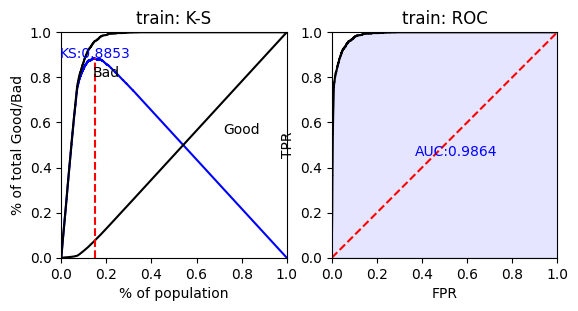

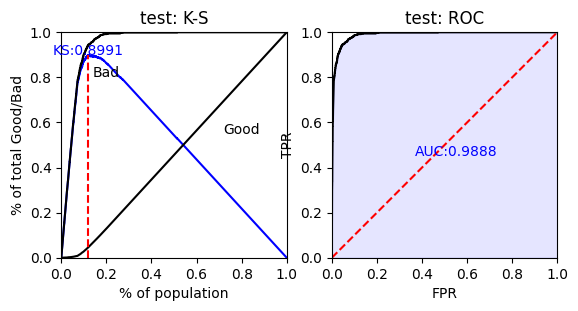

/usr/local/lib/python3.10/dist-packages/scorecardpy/scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [ ]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [ ]:
score

,occupation_type_points,gender_points,owns_car_points,yearly_debt_payments_points,credit_limit_points,no_of_days_employed_points,credit_limit_used(%)_points,net_yearly_income_points,credit_score_points,age_points,migrant_worker_points,score
34126,8.0,10.0,-6.0,15.0,-2.0,33.0,177.0,2.0,521.0,0.0,1.0,1318.0
44609,8.0,10.0,-6.0,-10.0,-2.0,33.0,177.0,-1.0,521.0,1.0,1.0,1291.0
44264,8.0,10.0,-6.0,-10.0,-2.0,33.0,-84.0,-1.0,-20.0,8.0,1.0,496.0
33556,8.0,10.0,13.0,15.0,-2.0,-6.0,177.0,-0.0,98.0,-2.0,1.0,871.0
28050,8.0,-16.0,13.0,15.0,12.0,33.0,177.0,-1.0,98.0,-2.0,1.0,897.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,8.0,10.0,-6.0,-10.0,-2.0,33.0,177.0,-1.0,521.0,1.0,1.0,1291.0
36228,-10.0,10.0,-6.0,-10.0,-5.0,-23.0,177.0,-1.0,521.0,1.0,1.0,1214.0
32772,-5.0,10.0,-6.0,15.0,-2.0,-6.0,177.0,-0.0,98.0,0.0,1.0,841.0
9762,-10.0,-16.0,-6.0,-10.0,-2.0,-23.0,177.0,-1.0,98.0,1.0,1.0,768.0


(array([1921.,  333., 1665., 1755., 2009., 3887., 3721., 1564., 7107.,
        6038.]),
 array([ 166. ,  288.7,  411.4,  534.1,  656.8,  779.5,  902.2, 1024.9,
        1147.6, 1270.3, 1393. ]),
 <BarContainer object of 10 artists>)

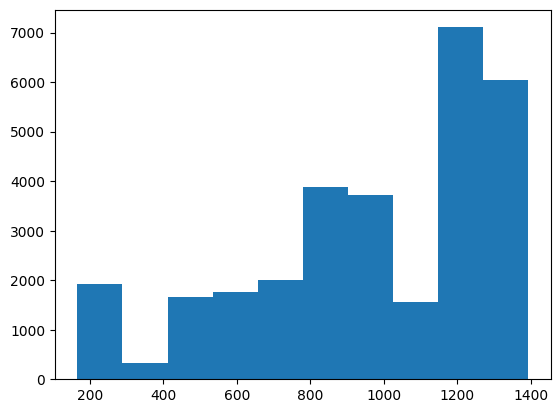

In [ ]:
plt.hist(score["score"])

In [ ]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)

    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)

    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)

    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)

    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)


In [ ]:
y_test

,credit_card_default
11858,0
22651,0
38925,0
2917,0
18012,0
...,...
37539,0
17978,1
5227,0
3994,0


## Logisitc Regression

In [ ]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# prediction
evaluation(logreg)

[[18243  1033]
 [  614 18662]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.72784810126582
F1_Score of TRAIN data: 95.7273434025399
[[7801  460]
 [  20  719]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.66666666666667
F1_Score of TEST data: 85.99461389160533
RMSE:  0.23094010767585033
ROC AUC score:  0.9586265346127253


#Use different models for Credit Risk Analysis

## Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8065  196]
 [  95  644]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.87      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.92      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.76666666666667
F1_Score of TEST data: 89.89924662418282
RMSE:  0.17981471945681568
ROC AUC score:  0.923860980700846


## Random Forest

In [ ]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8017  244]
 [  74  665]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.90      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.89      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.46666666666667
F1_Score of TEST data: 89.3795836262421
RMSE:  0.1879716290649558
ROC AUC score:  0.9351641531306354


## CatBoost

In [ ]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5822057	total: 85.4ms	remaining: 1m 25s
1:	learn: 0.4556110	total: 99.6ms	remaining: 49.7s
2:	learn: 0.3595461	total: 127ms	remaining: 42.1s
3:	learn: 0.3107021	total: 159ms	remaining: 39.6s
4:	learn: 0.2697308	total: 180ms	remaining: 35.8s
5:	learn: 0.2387874	total: 211ms	remaining: 35s
6:	learn: 0.1946746	total: 241ms	remaining: 34.1s
7:	learn: 0.1764201	total: 273ms	remaining: 33.9s
8:	learn: 0.1538726	total: 305ms	remaining: 33.6s
9:	learn: 0.1413368	total: 345ms	remaining: 34.1s
10:	learn: 0.1257648	total: 380ms	remaining: 34.1s
11:	learn: 0.1142465	total: 409ms	remaining: 33.7s
12:	learn: 0.1033140	total: 437ms	remaining: 33.2s
13:	learn: 0.0961522	total: 469ms	remaining: 33.1s
14:	learn: 0.0908257	total: 501ms	remaining: 32.9s
15:	learn: 0.0875844	total: 532ms	remaining: 32.7s
16:	learn: 0.0843476	total: 561ms	remaining: 32.4s
17:	learn: 0.0825803	total: 593ms	remaining: 32.4s
18:	learn: 0.0803079	total: 625ms	remaining: 32.3s
19:	learn:

In [ ]:
# prediction
evaluation(reg_catb)

[[19064   212]
 [   27 19249]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.38005810334094
F1_Score of TRAIN data: 99.38004382720685
[[8047  214]
 [  79  660]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.89      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.74444444444444
F1_Score of TEST data: 90.02354360477555
RMSE:  0.1804315813696581
ROC AUC score:  0.933596964002071


## XGBoost

In [ ]:
!pip install scikit-learn==0.24.2
!pip install xgboost==1.4.2
xgb_model = XGBClassifier(random_state=42)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 49.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
# prediction
evaluation(xgb_model)

[[19209    67]
 [   48 19228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 99.70170159784188
F1_Score of TRAIN data: 99.70170152538753
[[8132  129]
 [ 110  629]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8261
           1       0.83      0.85      0.84       739

    accuracy                           0.97      9000
   macro avg       0.91      0.92      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.34444444444445
F1_Score of TEST data: 91.29325730173308
RMSE:  0.16295875415440422
ROC AUC score:  0.9177673300322579


In [ ]:
xgb_model.feature_importances_

array([0.00675631, 0.01199557, 0.1511477 , 0.5563976 , 0.03397043,
       0.01223659, 0.01650092, 0.00971052, 0.01367285, 0.01423911,
       0.        , 0.02390504, 0.        , 0.01152375, 0.00386777,
       0.00626034, 0.01132194, 0.02747406, 0.00206754, 0.0162976 ,
       0.0344857 , 0.01210996, 0.0147626 , 0.00929605], dtype=float32)

In [ ]:
from xgboost import plot_importance

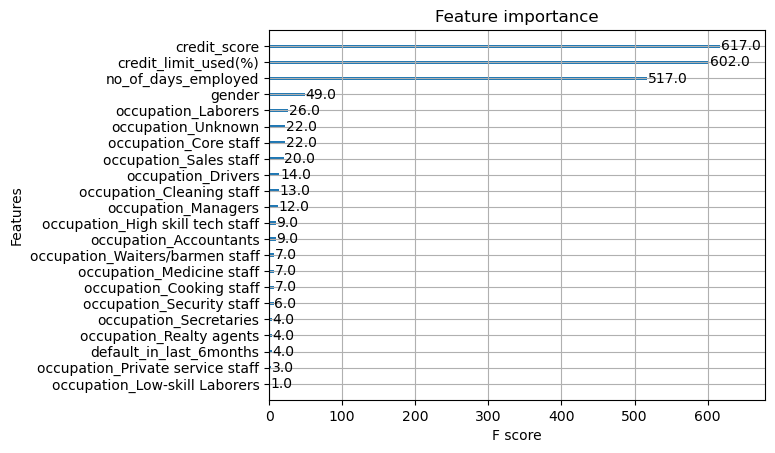

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

In [ ]:
# prediction
evaluation(lgbm_model)

[[18982   294]
 [   40 19236]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.13363768416684
F1_Score of TRAIN data: 99.13360007514721
[[8029  232]
 [  70  669]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.74      0.91      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.64444444444445
F1_Score of TEST data: 89.86970004174368
RMSE:  0.1831817555204545
ROC AUC score:  0.9385968173980188


## KNN

In [ ]:
# # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

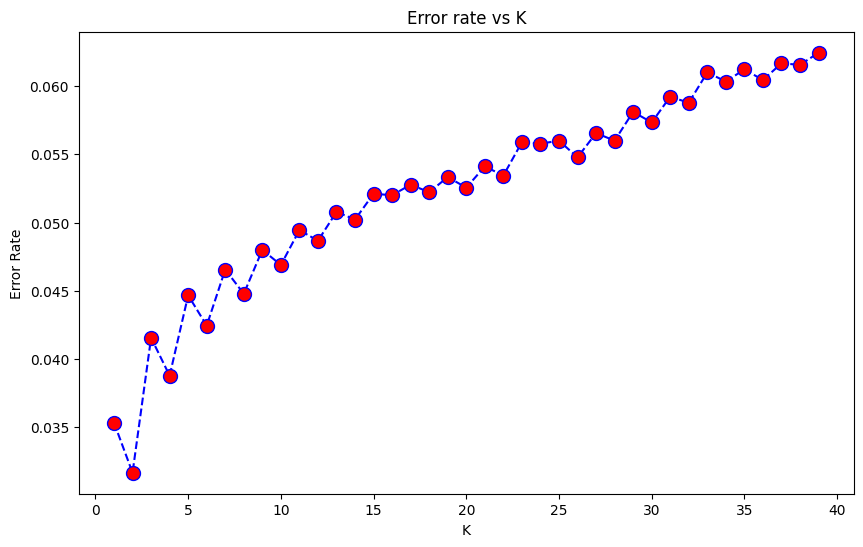

In [ ]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Choose k = 2

In [ ]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# # Evaluation
evaluation(knn)

[[19276     0]
 [  235 19041]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.39043369993774
F1_Score of TRAIN data: 99.39041104937563
[[8068  193]
 [  92  647]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.83333333333334
F1_Score of TEST data: 90.10750958038524
RMSE:  0.17795130420052185
ROC AUC score:  0.9260723267406284
